In [55]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

**Задача 1** Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с
помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и
среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [56]:
zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


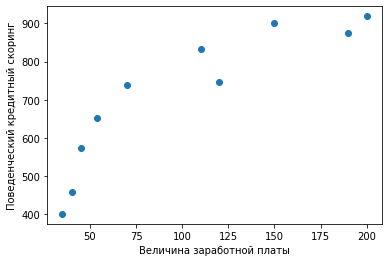

In [57]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Как видно из графика, зависимость линейная. Значит будем ожидать, что между этими данными существует выраженная положительная корреляция

Считаем ковариацию через мат ожидание

In [58]:
cov=np.mean(zp*ks)-np.mean(zp)*np.mean(ks)
cov

9157.839999999997

 через смещенную функцию cov

In [59]:
cov2=np.cov(zp,ks,ddof=0)
cov2

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

коэф пирсона через формулу смещенной ковариации

In [60]:
pear=cov/(zp.std(ddof=0)*ks.std(ddof=0))
pear

0.8874900920739158

через Numpy

In [61]:
pear_np=np.corrcoef(zp, ks)
pear_np

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

через Pandas

In [62]:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


**Вывод**: существует сильная линейная взаимосвязь между исходными данными

**Задача 2** Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [63]:
iq=np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

Поскольку из условия задачи нам ничего не известно ни о мат. ожидании генеральной совокупности ни о среднем квадратическом отклонении для генеральной совокупности, то для расчета 
доверительного интервала будем использовать 
$t$-критерий

In [64]:
n=iq.size
std=iq.std(ddof=1)
mean=iq.mean()
print(f'Среднее выборочное: {mean:.2f},\n'
      f'Размер выборки n=: {n},\n'
      f'Среднее квадратическое отклонение по выборке(несмещенное): {std:.2f}.'
     )

Среднее выборочное: 118.10,
Размер выборки n=: 10,
Среднее квадратическое отклонение по выборке(несмещенное): 10.55.


считаем значения $t$ и отклонение

In [65]:
t=stats.t.ppf((1+0.95)/2,n-1)
d=t*std/(n)**.5
d,t

(7.543916348412745, 2.2621571627409915)

считаем интервал

In [66]:
a=mean-d
b=mean+d
print(f'95%-й доверительный интервал для истинного значения IQ: [{a: .4f};{b: .4f}].')

95%-й доверительный интервал для истинного значения IQ: [ 110.5561; 125.6439].


**Задача 3** Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для
математического
ожидания с надежностью 0.95.

Поскольку нам известнa дисперсия генеральной совокупности, то для расчета 
доверительного интервала, будем использовать $z$
-критерий.

In [67]:
var=25
std=(var)**.5
n=27
mean=174.2

считаем значения z и отклонения

In [68]:
z=stats.t.ppf((1+0.95)/2,n-1)
d=z*std/(n)**.5
d,z

(1.977934124546103, 2.055529438642871)

In [69]:
a=mean-d
b=mean+d
print(f'95%-й доверительный интервал для оценки мат. ожидания генеральной совокупности: [{a: .4f};{b: .4f}].')

95%-й доверительный интервал для оценки мат. ожидания генеральной совокупности: [ 172.2221; 176.1779].
